# Loan Prediction
#### By- Roshan Kumar


In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sn 
import sklearn
import imblearn

###### Reading the dataset

In [2]:
df=pd.read_csv('LoanData.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
#to check the columns present in the dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# for numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# for categorical variables
df.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001677,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Cleaning

In [9]:
# checking no. of Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# using mode values to impute categorical columns
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [11]:
# using median values to impute the numerical columns
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

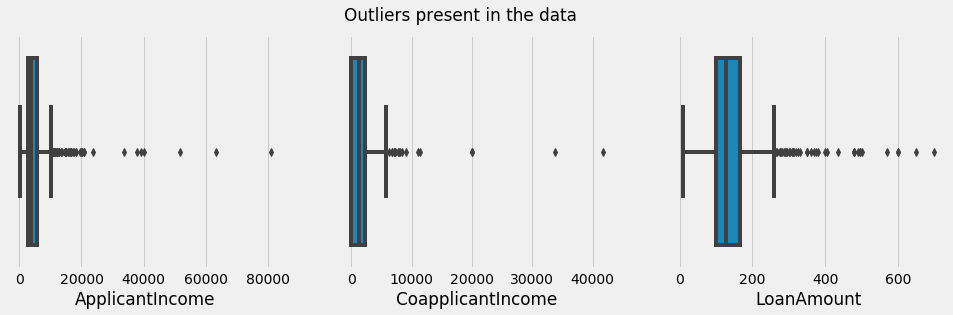

In [13]:
# visualize the outliers using Box Plot
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,4)
plt.subplot(1,3,1)
sn.boxplot(df['ApplicantIncome'])
plt.subplot(1,3,2)
sn.boxplot(df['CoapplicantIncome'])
plt.subplot(1,3,3)
sn.boxplot(df['LoanAmount'])
plt.suptitle('Outliers present in the data')
plt.show()

##### Removing Outliers

In [14]:
#shape before removing outliers
df.shape

(614, 13)

In [15]:
# lets filter the customers having more than 25000 coapplicant income
df=df[df['ApplicantIncome']<25000]

In [16]:
#shape after removing outliers
df.shape

(607, 13)

In [17]:
# lets filter the customers having more than 10000 coapplicant income
df=df[df['CoapplicantIncome']<10000]

In [18]:
df.shape

(601, 13)

In [19]:
# lets filter the customers having more than 400 loan amount
df=df[df['LoanAmount']<400]

In [20]:
df.shape

(590, 13)

## Univariate Data Analysis

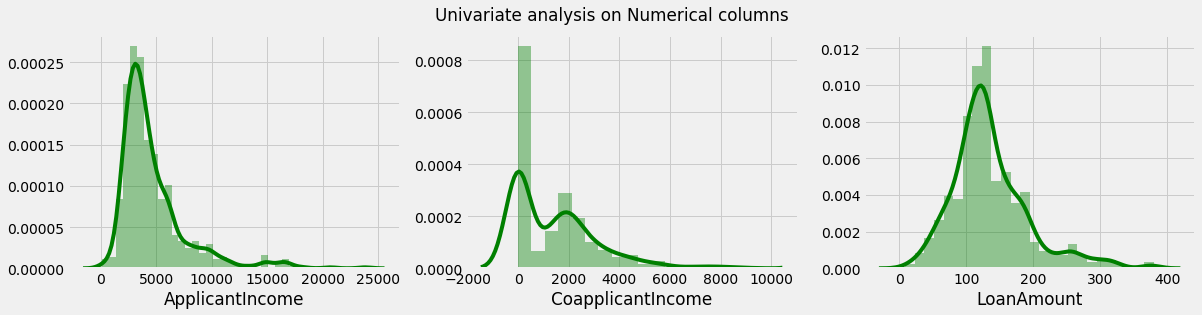

In [21]:
# Univariate Analysis on Numerical Columns
plt.rcParams['figure.figsize']=(18,4)
plt.subplot(1,3,1)
sn.distplot(df['ApplicantIncome'],color='green')
plt.subplot(1,3,2)
sn.distplot(df['CoapplicantIncome'],color='green')
plt.subplot(1,3,3)
sn.distplot(df['LoanAmount'],color='green')
plt.suptitle('Univariate analysis on Numerical columns')
plt.show()

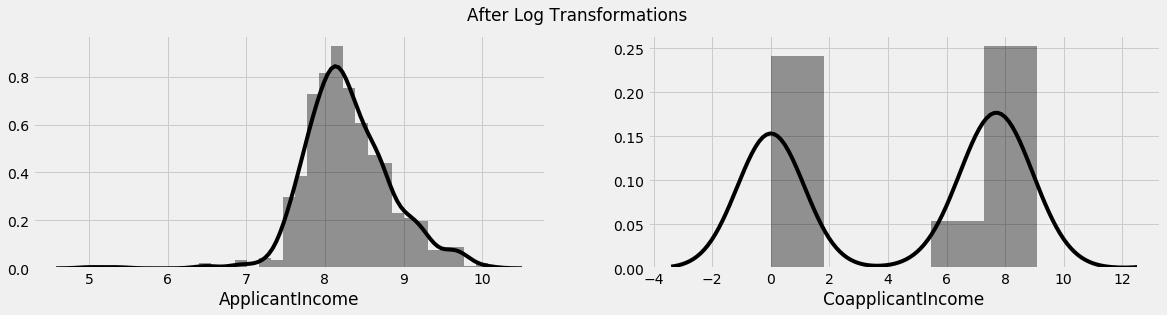

In [22]:
# lets remove skewness from ApplicantIncome and Coapplicant Income, as it can add bias to the data
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 4)

# lets apply log transformation to remove skewness
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

# lets plot them and check whether the skewness is removed or not
plt.subplot(1, 2, 1)
sn.distplot(df['ApplicantIncome'], color = 'black')

plt.subplot(1, 2, 2)
sn.distplot(df['CoapplicantIncome'], color = 'black')

plt.suptitle('After Log Transformations')
plt.show()

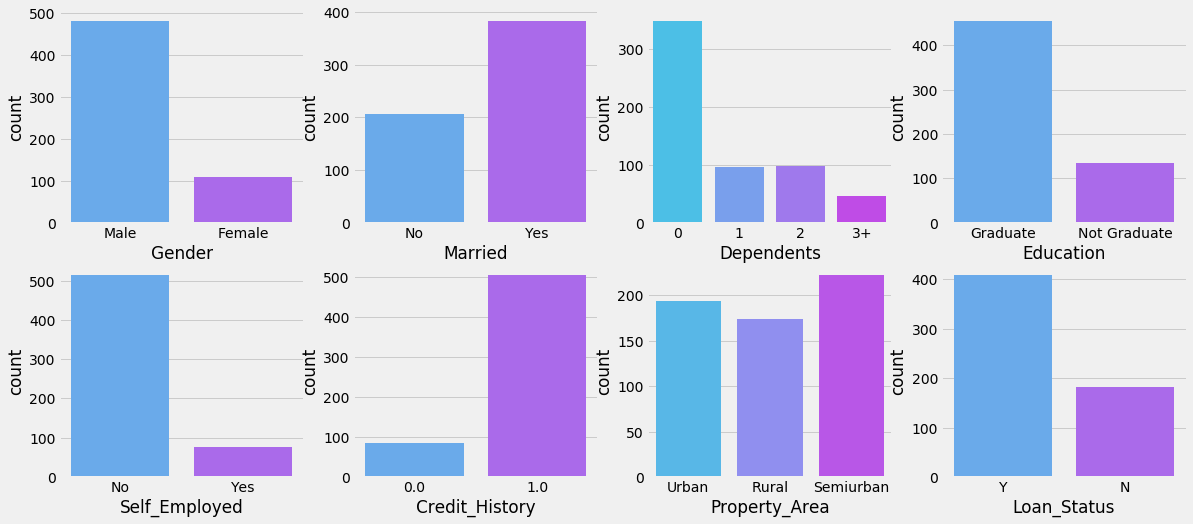

In [23]:
#Univariate Analysis on Categorical Columns
plt.rcParams['figure.figsize']=(18,8)
plt.subplot(2,4,1)
sn.countplot(df['Gender'],palette='cool')   
plt.subplot(2,4,2)
sn.countplot(df['Married'],palette='cool')
plt.subplot(2,4,3)
sn.countplot(df['Dependents'],palette='cool')
plt.subplot(2,4,4)
sn.countplot(df['Education'],palette='cool')
plt.subplot(2,4,5)
sn.countplot(df['Self_Employed'],palette='cool')
plt.subplot(2,4,6)
sn.countplot(df['Credit_History'],palette='cool')
plt.subplot(2,4,7)
sn.countplot(df['Property_Area'],palette='cool')
plt.subplot(2,4,8)
sn.countplot(df['Loan_Status'],palette='cool')

## Bivariate Data Analysis

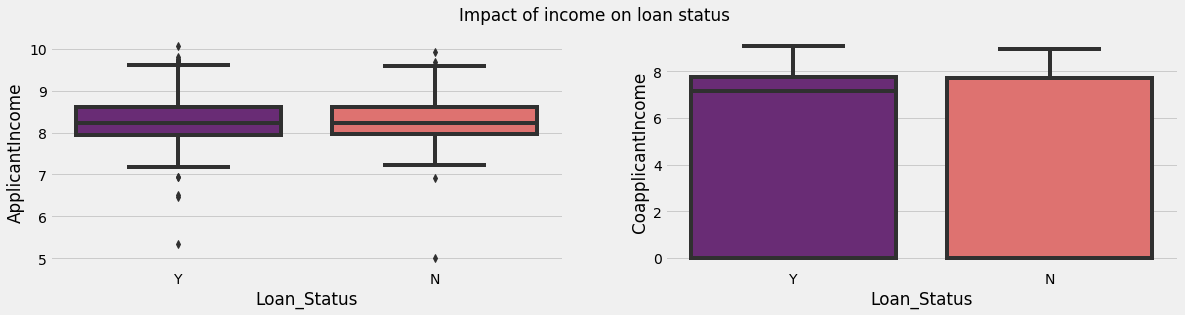

In [24]:
# lets check the Impact of Amount on Loan Status
plt.rcParams['figure.figsize']=(18,4)

plt.subplot(1,2,1)
sn.boxplot(df['Loan_Status'],df['ApplicantIncome'],palette='magma')
plt.subplot(1,2,2)
sn.boxplot(df['Loan_Status'],df['CoapplicantIncome'],palette='magma')
plt.suptitle('Impact of income on loan status')
plt.show()

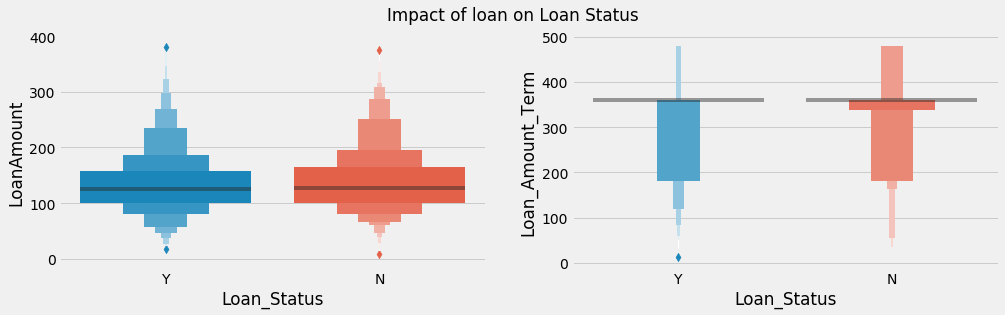

In [25]:
# lets check the Impact of Amount on Loan Status
plt.rcParams['figure.figsize']=(15,4)
plt.subplot(1,2,1)
sn.boxenplot(df['Loan_Status'],df['LoanAmount'])
plt.subplot(1,2,2)
sn.boxenplot(df['Loan_Status'],df['Loan_Amount_Term'])
plt.suptitle('Impact of loan on Loan Status')
plt.show()

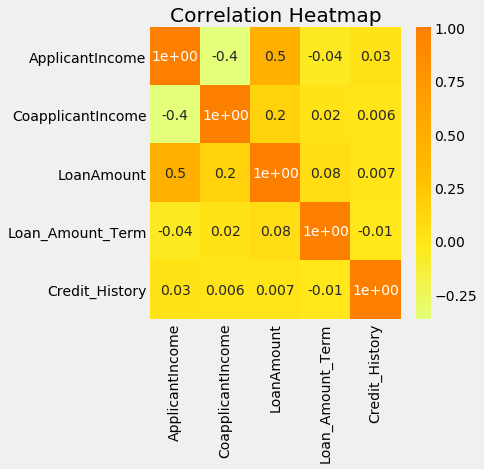

In [26]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('fivethirtyeight')

sn.heatmap(df.corr(),annot = True,fmt = '0.01',cmap = 'Wistia')
plt.title('Correlation Heatmap')
plt.show()

### Comparing Categorical Data with Target Columns

In [27]:
# lets compare all the Categories with respect to the Loan Status to understand the Overall Impact
print("Impact of Marraige on loan status")
print(pd.crosstab(df['Loan_Status'],df['Married']))
print('\n')
print("Impact of Dependents on loan status")
print(pd.crosstab(df['Loan_Status'],df['Dependents']))
print('\n')
print("Impact of Education on loan status")
print(pd.crosstab(df['Loan_Status'],df['Education']))
print('\n')
print("Impact of Employment on loan status")
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))
print('\n')
print("Impact of Property on loan status")
print(pd.crosstab(df['Loan_Status'],df['Property_Area']))
print('\n')


Impact of Marraige on loan status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on loan status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on loan status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on loan status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on loan status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129




## Data Preparation

In [28]:
# lets check the columns which are of object data types
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [29]:
# lets check the shape of the data before deleting the columns
df.shape

(590, 13)

In [30]:
# lets delete the loan Id column from the data as this column has no relation with loan status
df=df.drop(['Loan_ID'],axis=1)

In [31]:
# lets check the shape of the data after deleting the columns
df.shape

(590, 12)

In [32]:
# lets encode other columns
df['Gender']=df['Gender'].replace(('Male','Female'),(1,0))
df['Married']=df['Married'].replace(('Yes','No'),(1,0))
df['Education']=df['Education'].replace(('Graduate','Not Graduate'),(1,0))
df['Self_Employed']=df['Self_Employed'].replace(('Yes','No'),(1,0))
df['Loan_Status']=df['Loan_Status'].replace(('Y','N'),(1,0))

In [33]:
# as seen above that Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge 
# them together
df['Property_Area']=df['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))

# as seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
df['Dependents']=df['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))

# lets check whether there is any object column left
df.select_dtypes('object').columns

Index([], dtype='object')

In [34]:
# lets split the Target column from the Data
y=df['Loan_Status']
x=df.drop(['Loan_Status'],axis=1)

# lets check the shape of x and y
print(x.shape)
print(y.shape)

(590, 11)
(590,)


### Resampling for Balancing the Data

In [35]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE
x_resample,y_resample=SMOTE().fit_sample(x,y.values.ravel())
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [36]:
# lets also check the value counts of our target variable before and after sampling
print(y.value_counts())
y_resample=pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

1    408
0    182
Name: Loan_Status, dtype: int64
1    408
0    408
Name: 0, dtype: int64


In [37]:
# lets split the test data from the training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=0)

print("Shape of x train:",x_train.shape)
print("Shape of y train:",y_train.shape)
print("Shape of x test:",x_test.shape)
print("Shape of y test:",y_test.shape)

Shape of x train: (652, 11)
Shape of y train: (652, 1)
Shape of x test: (164, 11)
Shape of y test: (164, 1)


## Machine Learning Modelling

In [38]:
# lets apply Logistic Regression
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression(random_state=0)
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [39]:
print(lreg.score(x_train,y_train))
print(lreg.score(x_test,y_test))

0.7469325153374233
0.7621951219512195


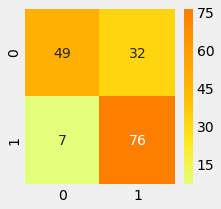

In [40]:
# lets analyze the Performance using Confusion matrix and use classification report for performance analysis
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(3,3)
sn.heatmap(cm,annot=True,cmap='Wistia',fmt='.8g')
plt.show()

In [41]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.60      0.72        81
           1       0.70      0.92      0.80        83

   micro avg       0.76      0.76      0.76       164
   macro avg       0.79      0.76      0.76       164
weighted avg       0.79      0.76      0.76       164



## Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gdc=GradientBoostingClassifier()
gdc.fit(x_train,y_train)
y_pred=gdc.predict(x_test)

In [43]:
print(gdc.score(x_train,y_train))
print(gdc.score(x_test,y_test))

0.9156441717791411
0.8658536585365854


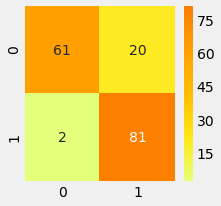

In [44]:
# lets analyze the Performance using Confusion matrix and use classification report for performance analysis
cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(3,3)
sn.heatmap(cm,annot=True,cmap='Wistia',fmt='.8g')
plt.show()

In [45]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.75      0.85        81
           1       0.80      0.98      0.88        83

   micro avg       0.87      0.87      0.87       164
   macro avg       0.89      0.86      0.86       164
weighted avg       0.88      0.87      0.86       164



## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

In [47]:
print(rfc.score(x_train,y_train))
print(rfc.score(x_test,y_test))

0.9923312883435583
0.8536585365853658


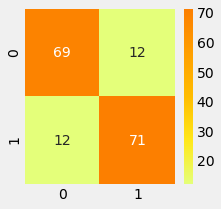

In [48]:
# lets analyze the Performance using Confusion matrix and use classification report for performance analysis
cm=confusion_matrix(y_test,y_pred)
plt.rcParams['figure.figsize']=(3,3)
sn.heatmap(cm,annot=True,cmap='Wistia',fmt='.8g')
plt.show()

In [49]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        81
           1       0.86      0.86      0.86        83

   micro avg       0.85      0.85      0.85       164
   macro avg       0.85      0.85      0.85       164
weighted avg       0.85      0.85      0.85       164



In [50]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)

[0.74242424 0.83333333 0.84848485 0.83333333 0.84848485 0.87692308
 0.72307692 0.8125     0.84375    0.859375  ]


In [51]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(random_state = 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print(scores)

[0.74242424 0.81818182 0.83333333 0.86363636 0.86363636 0.78461538
 0.73846154 0.796875   0.8125     0.796875  ]
